# Class 8: Integration with Cursor
## Objective: Learn how to use Cursor to write code and debug code

This notebook provides practice for using the AI tools in Cursor.

**Instructions:** Work with one or more students at your table. Discuss the key concepts and the code logic with one another. 

## Section 1: Inline Magic

**Purpose:** Use for quick, local edits. For example, writing single functions, adding docstrings, or fixing a line of code without leaving the current cell. 

In [1]:
import numpy as np

## Generate some random numbers for magnitudes for the first exercise

# Define the desired mean and standard deviation
mean = 1
std_dev = 1
# Define the number of random numbers to generate
num_samples = 15

# Generate a set of random numbers from a normal distribution
# loc is the mean, scale is the standard deviation, size is the number of samples
fluxes = np.random.normal(loc=mean, scale=std_dev, size=num_samples)
print(fluxes)

[-0.21349888 -2.16931527  0.8729238  -1.23696198  1.57784136  0.01451623
 -1.02190485 -0.15919373  0.24605054 -1.49314687  2.40581873  1.81349683
  1.95720494  1.28828805  2.54230556]


**Exercise:** 
1. Click in the cell below.
2. Press `Cmd+K` (macOS) or `Ctrl+K` (Windows)
3. Type "Write a function called flux_to_mag that takes an array of fluxes and returns an array of magnitudess using the formula -2.5 * log10(flux). The function should use numpy arrays and handle negative fluxes by returning None for those array values."
4. Check the code try to understand if it is correct. If so, click on **Accept**.
5. Excute the code produced by the AI.
6. Execute the following code cell to test your new function.

In [2]:
def flux_to_mag(fluxes):
    """
    Convert an array of fluxes to magnitudes using the formula:
    mag = -2.5 * log10(flux)
    Returns an array of magnitudes, with None for any negative flux values.
    """
    magnitudes = []
    for f in fluxes:
        if f > 0:
            mag = -2.5 * np.log10(f)
            magnitudes.append(mag)
        else:
            magnitudes.append(None)
    return np.array(magnitudes, dtype=object)

In [7]:
# Test the new function
test = flux_to_mag(np.full(5, 100))
print(test)

[np.float64(-5.0) np.float64(-5.0) np.float64(-5.0) np.float64(-5.0)
 np.float64(-5.0)]


## Section 2: Chat Sidebar

**Purpose:** Think of the chat sidebar as a consultant, a more knowledgeable programming sitting next to you that you can ask questions. It is a good choice to explain why an error is happening or for brainstorming how to visualize data.

You can also use `@` to reference specific parts of your notebook. 

**Exercise:** The code below has multiple errors. Try the following:
1. Highlight the code block below
2. Press `Cmd+L` or `Ctrl+L` to open the Chat (or click the Add to Chat button if it appears)
3. Type: "This code is not working and the legend isn't showing up. Please explain what is wrong and provide a version that should work."
4. Read about the three fixes and try to understand them
5. Execure the corrected cell

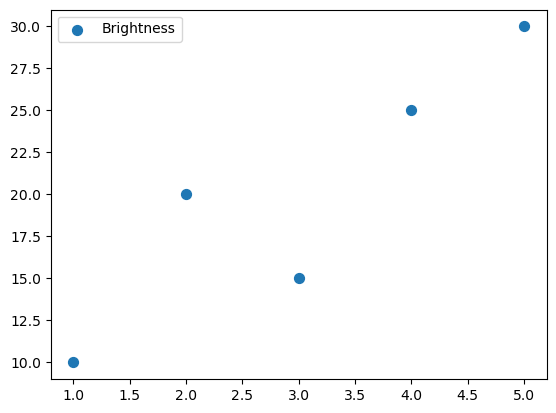

In [8]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 15, 25, 30]

# Fixed version:
fig, ax = plt.subplots()  # subplots() returns (fig, ax); subplot() has different behavior
ax.scatter(x, y, s=50, label="Brightness")  # scatter() needs both x AND y coordinates
ax.legend()  # Show the legend (using ax.legend() to match our axes object)
plt.show()   # Must call with () to actually display the plot!

## Section 3: Composer

**Purpose:** Think of the Composer as a professional software engineer. The Composure is for structureal changes that could include creating new files, creating modules, and moving code around. It can see the entire folder, not just a notebook cell or a single notebook.  

**Exercise:**
1. Press `Cmd+I` or `Ctrl+I` to open the Composer in the sidebar
2. Type: "Create a new file in my current folder called `astro_logic.py`. In that file, define a class called `Observation` with attributes for `target_name` and `filter_name`. Include a method that prints 'Starting observation of [target] in [filter]'
3. When the Composer shows you the file in the sidebar, review the content to make sure it looks reasonable, and then click **Apply** or **Keep**
4. Execute the cell below to test your new module

In [9]:
# After using Composer, try running this:
from astro_logic import Observation
obs = Observation("M31", "R-band")
obs.start_obs()

Starting observation of M31 in R-band


## Bonus: 

The full power of these tools is more obvious when we use them to produce really nice, technically challenging results in a short amount of time. 

This prompt produces a plot of the Planck's Law, which describes the spectral radiance (or surface brightness) from a perfect emitter (called a Blackbody) at some temperature as a function of wavelength. This is a good, first approximation to the amount of flux emitted by most stars as a function of wavelength. 

Try this prompt to produce a figure that shows Planck's Law for a relatively hot star (a 10,000 K  A0V like Vega), a star like the Sun (a 5,800 K G2V), and a cool star (a 3,500 K star like Betelgeuse). 

Prompt: *Write a function for Planck's Law that calculates Intensity as a function of Wavelength and Temperature. Use numpy and scientific constants. Then, plot the curves for 3500K (e.g. Betelgeuse), 5800K (Sun), and 10000K (e.g. Vega) for wavelengths from 100nm to 2000nm. Use the usual astronomy convention that hot stars are blue, so use a blue line for the hottest star, and that cool stars are red. Use mks units throughout. Also, mark the visible wavelength range with a rainbow of vertical stripes of different colors, at least the ROYGBIV colors. Use a log-scale y-axis and make the plot look professional.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

def planck_law(wavelength, temperature):
    """
    Calculate spectral radiance using Planck's Law.
    
    Parameters:
        wavelength : array-like
            Wavelength in meters (MKS units)
        temperature : float
            Temperature in Kelvin
    
    Returns:
        Spectral radiance in W/(m² sr m) - power per unit area per steradian per wavelength
    """
    h = constants.h      # Planck's constant (J·s)
    c = constants.c      # Speed of light (m/s)
    k = constants.k      # Boltzmann constant (J/K)
    
    # Planck's Law: B(λ,T) = (2hc²/λ⁵) × 1/(exp(hc/λkT) - 1)
    numerator = 2 * h * c**2 / wavelength**5
    exponent = h * c / (wavelength * k * temperature)
    denominator = np.exp(exponent) - 1
    
    return numerator / denominator

# Define wavelength range: 100nm to 2000nm in meters
wavelengths_nm = np.linspace(100, 2000, 1000)
wavelengths_m = wavelengths_nm * 1e-9  # Convert nm to meters

# Define star temperatures and their colors (hot=blue, cool=red)
stars = [
    {"name": "Vega (10,000 K)", "temp": 10000, "color": "blue"},
    {"name": "Sun (5,800 K)", "temp": 5800, "color": "orange"},
    {"name": "Betelgeuse (3,500 K)", "temp": 3500, "color": "red"},
]

# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Define visible spectrum bands (ROYGBIV) with wavelength ranges in nm
visible_bands = [
    {"range": (380, 450), "color": "#8B00FF", "label": "Violet"},
    {"range": (450, 485), "color": "#0000FF", "label": "Blue"},
    {"range": (485, 500), "color": "#00FFFF", "label": "Cyan"},
    {"range": (500, 565), "color": "#00FF00", "label": "Green"},
    {"range": (565, 590), "color": "#FFFF00", "label": "Yellow"},
    {"range": (590, 625), "color": "#FFA500", "label": "Orange"},
    {"range": (625, 750), "color": "#FF0000", "label": "Red"},
]

# Plot rainbow stripes for visible spectrum
for band in visible_bands:
    ax.axvspan(band["range"][0], band["range"][1], alpha=0.3, color=band["color"])

# Plot Planck curves for each star
for star in stars:
    intensity = planck_law(wavelengths_m, star["temp"])
    ax.plot(wavelengths_nm, intensity, label=star["name"], color=star["color"], linewidth=2.5)

# Configure the plot
ax.set_yscale("log")
ax.set_xlabel("Wavelength (nm)", fontsize=14)
ax.set_ylabel("Spectral Radiance (W m⁻² sr⁻¹ m⁻¹)", fontsize=14)
ax.set_title("Planck's Law: Blackbody Radiation for Different Stellar Temperatures", fontsize=16)
ax.legend(loc="upper right", fontsize=12)
ax.set_xlim(100, 2000)
ax.grid(True, alpha=0.3, which="both", linestyle="--")
ax.tick_params(axis="both", which="major", labelsize=12)

# Add annotation for visible range
ax.annotate("Visible\nSpectrum", xy=(565, 1e14), fontsize=11, ha="center", 
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()